# University City Vehicle Stops, from 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### The first step must include importing the data and inspecting it using a variety of Pandas functions and attributes

In [2]:
data = pd.read_csv('u_city_2018_vehicle_stops.csv', parse_dates=[' STOP_DATE', ' TIME_OF_STOP'])

# Commenting out for brevity of the Notebook
# display(data.info())
# display(data.describe())

##### Next, the data must be cleaned to remove all non-relevant information to make it easier to work with

In [3]:
#Droping NaN columns from the raw data, adding how modifier to not lose relevant data
data.dropna(axis=1, how='all', inplace=True)

#Dropping columns by name was raising errors, so checking why
# Commenting out for brevity of the Notebook
# print(data.columns)

#Verifying column has the same values for every row, making it irrelevant
data['ORI'].nunique()
data.drop(columns=['ORI', ' DSN', ' SEQ_NO', ' EVENT_NO', ' ENTER_DATE', ' ENTER_TIME', ' ENTER_ACID', \
                   ' LAST_UPDATE_DATE', ' LAST_UPDATE_TIME', ' LAST_UPDATE_ACID', ' SECOND_DSN', ' STATUS_CODE'], \
                  inplace=True)

#Dropping last 30 or so columns that don't contain any relevant data
data.drop(columns=[col for col in data.columns if 'Unnamed' in col], inplace=True)

#Re-inspecting to ensure the columns were dropped
# Commenting out for brevity of the Notebook
# data.info()
display(data.head())

,STOP_DATE,TIME_OF_STOP,REF_NO,RACE_BEFORE_STOP,RES_JURISDICTION,SEX,RACE,AGE_CODE,STOP_LOCATION,VIOL_INVESTIGATIVE,...,CNTR_OTHER,SEARCH_ARREST,CHRG_WAR_WAN,CHRG_TRAFF_VIOL,CHRG_DRUG_VIOL,CHRG_RESIST_ARR,CHRG_OFF_PERSON,CHRG_PROP_CRIME,CHRG_OTHER,CHRG_DWI
0,2018-01-01,1100,TA00802186,N,Y,M,B,D,S,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,1819,TA00802235,N,N,M,W,B,C,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,1756,TA00802261,N,Y,F,H,B,C,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,1820,TA00802444,N,N,F,A,D,S,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,1347,TA00802445,N,N,F,B,D,C,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Now that only relevant data is included in the DataFrame, computations and aggregations can begin, to extract insights

### Are there significant differences observed, by race, in the amount of stops made related to the overall population percentage of University City? 

#### Recent racial demographics obtained from: https://www.census.gov/quickfacts/fact/table/universitycitycitymissouri/PST045219#PST045219

In [4]:
#The total demographics of the city must be created to compare to the demographics of the traffic stops

#Grabbing total count to obtain percentages
stop_count = data[' REF_NO'].nunique()

#Performing a count on stops by racial group
race_group = data.groupby(' RACE')[' REF_NO'].nunique()

#Determining the percent of stops by racial group
race_percent = race_group / stop_count * 100.0

#The total demographics of the city must be added to compare to the demographics of the traffic stops
race_df = pd.DataFrame({'# Stopped': race_group, '% of Stopped': race_percent, '% of City Pop': \
                       [4.60, 35.2, 3.00, 0.50, 2.40, 54.20]})
pd.options.display.float_format = '{:.2f} %'.format

race_df.rename(index={'A': 'Asian', 'B': 'Black', 'H': 'Hispanic', 'I': 'Indigenous', 'U': \
                      'Unknown', 'W': 'White'}, inplace=True)

race_df

,# Stopped,% of Stopped,% of City Pop
RACE,,,
Asian,226,3.46 %,4.60 %
Black,4275,65.52 %,35.20 %
Hispanic,68,1.04 %,3.00 %
Indigenous,31,0.48 %,0.50 %
Unknown,102,1.56 %,2.40 %
White,1823,27.94 %,54.20 %


In [5]:
race_df.reset_index(inplace=True)

#Need to group by again to do a side-by-side bar plot? Or should I stack them?

display(race_df)
print(race_df.index)
print(race_df.columns)
print(race_df.values)

,RACE,# Stopped,% of Stopped,% of City Pop
0,Asian,226,3.46 %,4.60 %
1,Black,4275,65.52 %,35.20 %
2,Hispanic,68,1.04 %,3.00 %
3,Indigenous,31,0.48 %,0.50 %
4,Unknown,102,1.56 %,2.40 %
5,White,1823,27.94 %,54.20 %


RangeIndex(start=0, stop=6, step=1)
Index([' RACE', '# Stopped', '% of Stopped', '% of City Pop'], dtype='object')
[['Asian' 226 3.4636015325670497 4.6]
 ['Black' 4275 65.51724137931035 35.2]
 ['Hispanic' 68 1.0421455938697317 3.0]
 ['Indigenous' 31 0.47509578544061304 0.5]
 ['Unknown' 102 1.5632183908045976 2.4]
 ['White' 1823 27.93869731800766 54.2]]


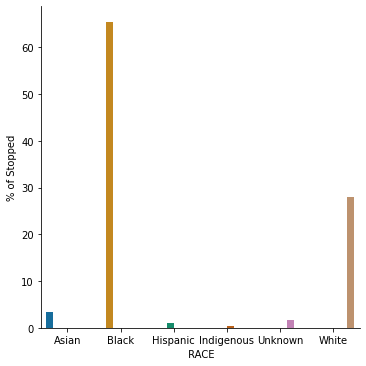

In [6]:
# fig, ax = plt.subplots(figsize=(10,6))
# ax1.set_title('Racial Comparison of Traffic Stops vs. City Population')
# ax1.set_xlabel('Race (based on visual observation)')
sns.catplot(x=' RACE', 
            y='% of Stopped', 
            data=race_df, 
            kind='bar', 
            hue=' RACE',
            palette='colorblind')

plt.show()



### Are there significant differences observed, by race, in the issuing of warnings vs. citations vs. arrests?

In [7]:
warn = data.groupby(' RACE')[' STOP_WARNING'].count()
cita = data.groupby(' RACE')[' STOP_CITATION'].count()
arrest = data.groupby(' RACE')[' CAUSE_INC_TO_ARR'].count()

warn_percent = warn / (warn + cita + arrest) * 100.0
cita_percent = cita / (warn + cita + arrest) * 100.0
arrest_percent = arrest / (warn + cita + arrest) * 100.0

race_action = pd.DataFrame({'Warning Issued': warn, '% Warned': warn_percent, 'Citation Issued': cita, '% Cited': \
                            cita_percent, 'Arrested': arrest, '% Arrested': arrest_percent})
race_action.rename(index={'A': 'Asian', 'B': 'Black', 'H': 'Hispanic', 'I': 'Indigenous', 'U': \
                      'Unknown', 'W': 'White'}, inplace=True)
race_action

,Warning Issued,% Warned,Citation Issued,% Cited,Arrested,% Arrested
RACE,,,,,,
Asian,66,32.67 %,136,67.33 %,0,0.00 %
Black,1402,41.89 %,1863,55.66 %,82,2.45 %
Hispanic,24,47.06 %,27,52.94 %,0,0.00 %
Indigenous,4,19.05 %,17,80.95 %,0,0.00 %
Unknown,26,30.95 %,57,67.86 %,1,1.19 %
White,540,34.73 %,999,64.24 %,16,1.03 %


In [8]:
#Violin plot here

### Is there a noticeable trend of stops based on the time of month or year?

In [9]:
#Obtaining a count per day of stops initiated
date_count = data[' STOP_DATE'].value_counts()

#Converting counts to a more visually appealing DataFrame
date_df = pd.DataFrame({'# of Stops': date_count})
display(date_df)

,# of Stops
2018-07-11,116
2018-02-16,55
2018-01-25,48
2018-02-13,47
2018-06-14,47
...,...
2018-08-03,1
2018-06-30,1
2018-10-19,1
2018-08-09,1


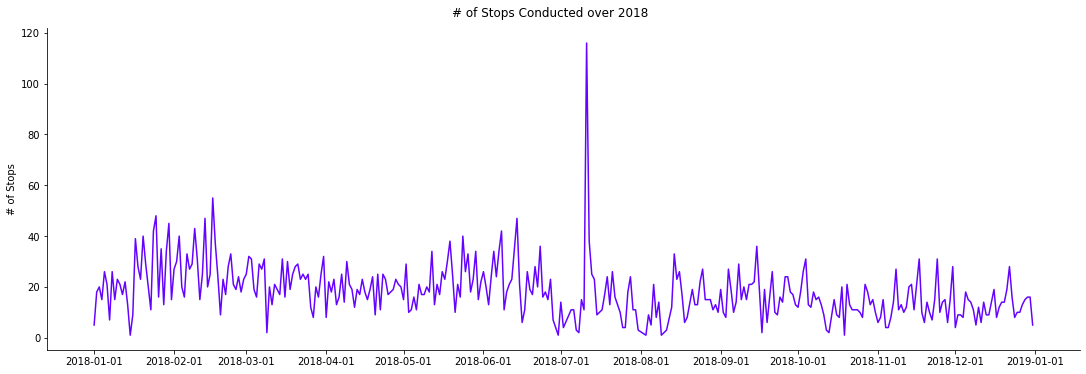

In [12]:
date_fig = sns.relplot(x=date_df.index, 
                       y='# of Stops', 
                       data=date_df, 
                       kind='line', 
                       color='#6403ff', 
                       aspect=3)
date_fig.fig.suptitle("# of Stops Conducted over 2018", y=1.03)

#Creating list to set x-tick marks to something more readable
beg_month = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', \
            '2018-10', '2018-11', '2018-12', '2019-01']
date_fig.set(xticks=beg_month)
plt.show()

### What were the reasons for the initial stop?

#### Initial Stop

In [19]:
#Performing counts on the various columns in question
stop_invest = data[' VIOL_INVESTIGATIVE'].count()
stop_equip = data[' VIOL_EQUIPMENT'].count()
stop_lic = data[' VIOL_LICENSE'].count()
stop_mov = data[' VIOL_MOVING'].count()

#Subset of moving violations are counted below
mov_speed = data[' MOVING_SPEED'].count()
mov_lane = data[' MOVING_LANE'].count()
mov_tail = data[' MOVING_TAIL'].count()
mov_cmv = data[' MOVING_CMV'].count()
mov_sig = data[' MOVING_SIGNAL'].count()
mov_other = data[' MOVING_OTHER'].count()

#Creating the DataFrame for the broad stop categories
stop_df = pd.DataFrame({'Investigative': [stop_invest], 'Equipment': [stop_equip], 'License': [stop_lic], \
                        'Moving': [stop_mov]})
display(stop_df.style.hide_index())

#Creating the DataFrame for the various moving violations
moving_df = pd.DataFrame({'Speeding': [mov_speed], 'Lane Violation': [mov_lane], 'Following Too Close': [mov_tail], \
                         'Commercial Motor Vehicle': [mov_cmv], 'Failure to Signal': [mov_sig], 'Other': [mov_other]})
display(moving_df.style.hide_index())

Investigative,Equipment,License,Moving
1134,1209,1600,3440


Speeding,Lane Violation,Following Too Close,Commercial Motor Vehicle,Failure to Signal,Other
1420,196,12,4,29,1822


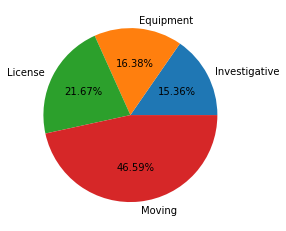

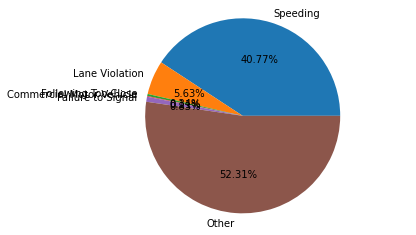

In [26]:
stop_group = [stop_invest, stop_equip, stop_lic, stop_mov]
stop_labels = ['Investigative', 'Equipment', 'License', 'Moving']
plt.pie(stop_group, labels=stop_labels, autopct='%0.2f%%')
plt.show()

mov_group = [mov_speed, mov_lane, mov_tail, mov_cmv, mov_sig, mov_other]
mov_labels = ['Speeding', 'Lane Violation', 'Following Too Close', 'Commercial Motor Vehicle', 'Failure to Signal', 'Other']
plt.pie(mov_group, labels=mov_labels, autopct='%0.2f%%')
plt.axis('equal')
plt.show()